In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Importing the dataset

In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2021-08-07 14:43:44--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.60
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  11.3MB/s    in 16s     

2021-08-07 14:44:01 (9.62 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Visualizing the dataset

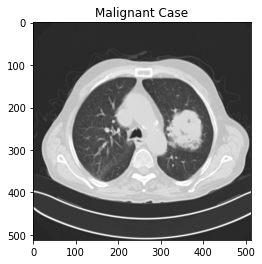

In [ ]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [ ]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")

In [ ]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")

In [ ]:
train_data_generator.next()[1]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

<h2> The Model </h2>

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.4))

model.add(Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator)) 

Epoch 1/50
61/61 [==============================] - 13s 194ms/step - loss: 0.9713 - accuracy: 0.5093 - val_loss: 0.9644 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 12s 192ms/step - loss: 0.9194 - accuracy: 0.5454 - val_loss: 0.9486 - val_accuracy: 0.4673
Epoch 3/50
61/61 [==============================] - 12s 192ms/step - loss: 0.7306 - accuracy: 0.6887 - val_loss: 1.0328 - val_accuracy: 0.5047
Epoch 4/50
61/61 [==============================] - 12s 189ms/step - loss: 0.5518 - accuracy: 0.8031 - val_loss: 1.0629 - val_accuracy: 0.4860
Epoch 5/50
61/61 [==============================] - 12s 189ms/step - loss: 0.4176 - accuracy: 0.8361 - val_loss: 0.8546 - val_accuracy: 0.6822
Epoch 6/50
61/61 [==============================] - 12s 189ms/step - loss: 0.3164 - accuracy: 0.8773 - val_loss: 1.1321 - val_accuracy: 0.6262
Epoch 7/50
61/61 [==============================] - 12s 189ms/step - loss: 0.2886 - accuracy: 0.8825 - val_loss: 0.8108 - val_accuracy: 0.6729

### Preparing Test Data for prediction

In [ ]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")

Found 20 images belonging to 3 classes.


In [ ]:
test_data_generator.next()[1]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

# Model accuracy and loss trends

Lets visualize the accuracy and loss trends throughout the training process

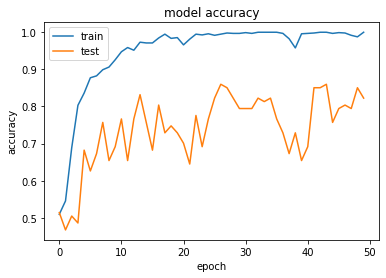

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

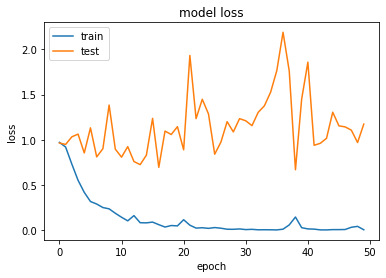

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the predictions of the model on unseen data

In [ ]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(5):
    img = x[i]
    print(img.shape)
    img = img.reshape(-1,64,64,1)
    print(img.shape)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)
    break

(64, 64, 1)
(1, 64, 64, 1)


In [ ]:
#Making the Output meaningful using named classes

cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Normal', 1: 'Normal', 2: 'Malignant', 3: 'Malignant', 4: 'Benign'}
PREDICTIONS: {0: 'Normal', 1: 'Malignant', 2: 'Malignant', 3: 'Malignant', 4: 'Malignant'}


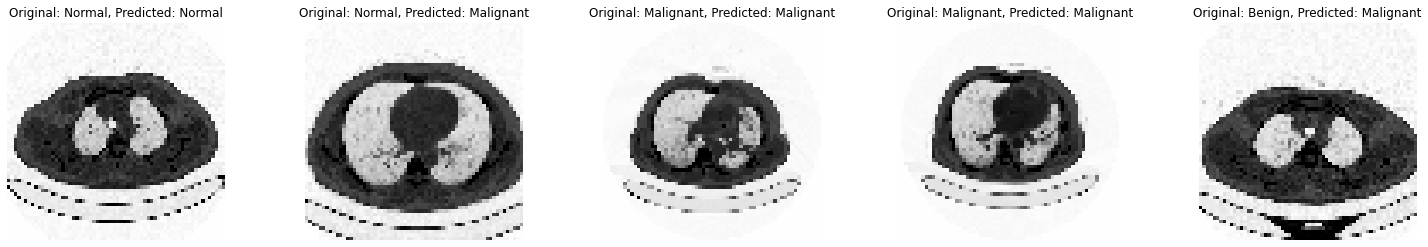

In [ ]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i][:,:,0], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()

In [ ]:
model.save("lung_cancer_prediction.h5")